# A bit of a review

Start: import our usual things

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
gdp = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/spring2020/master/week01/data/GDP.csv")

In [3]:
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21340.267


In [4]:
gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [5]:
gdp.describe() # some statistics about our data

,GDP
count,291.000000
mean,6143.539148
std,6239.154340
min,243.164000
25%,723.990500
50%,3578.848000
75%,10597.058000
max,21542.540000


In [6]:
gdp.iloc[4] # grabs a particular row

DATE    1948-01-01
GDP        265.742
Name: 4, dtype: object

In [8]:
gdp.columns # grabbed a "list" of columns

Index(['DATE', 'GDP'], dtype='object')

In [9]:
gdp['DATE'] # indexing by column

0      1947-01-01
1      1947-04-01
2      1947-07-01
3      1947-10-01
4      1948-01-01
          ...    
286    2018-07-01
287    2018-10-01
288    2019-01-01
289    2019-04-01
290    2019-07-01
Name: DATE, Length: 291, dtype: object

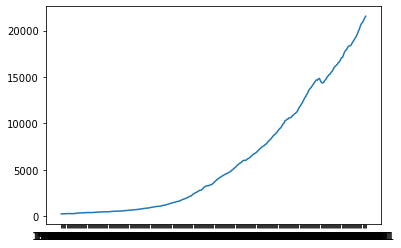

In [11]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.show()

In [12]:
# did our first round of data formatting
gdp['DATE'] = pd.to_datetime(gdp['DATE'])

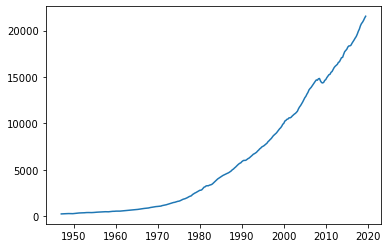

In [13]:
plt.plot(gdp['DATE'], gdp['GDP'])
plt.show()

In [14]:
gdp2 = pd.read_csv('GDP.csv')

In [16]:
gdp2

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
286,2018-07-01,20749.752
287,2018-10-01,20897.804
288,2019-01-01,21098.827
289,2019-04-01,21340.267


In [23]:
movies = pd.read_csv('datasets_674388_1186156_tv_shows2.csv')

In [24]:
# here is reading from another folder
#movies2 = pd.read_csv('/Users/jillnaiman/Downloads/datasets_674388_1186156_tv_shows_downloadsFolder.csv')
#movies2 = pd.read_csv('/Users/jillnaiman/Downloads/datasets_674388_1186156_tv_shows_downloadsFolder.csv')
#movies2 = pd.read_csv('C:/Users/USERNAME/Downloads') # something like this in windows

In [27]:
movies

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


In [29]:
# let's make a plot of IMDb rating as a function of year using matplotlib -- plt
# let's first look at the Year column
movies['Year']

0       2008
1       2016
2       2017
3       2010
4       2015
        ... 
5606    2018
5607    2017
5608    2018
5609    2017
5610    2016
Name: Year, Length: 5611, dtype: int64

In [31]:
# let's look at IMDb rating column
movies['IMDb']

0       9.5
1       8.8
2       8.4
3       9.1
4       8.7
       ... 
5606    NaN
5607    NaN
5608    NaN
5609    NaN
5610    NaN
Name: IMDb, Length: 5611, dtype: float64

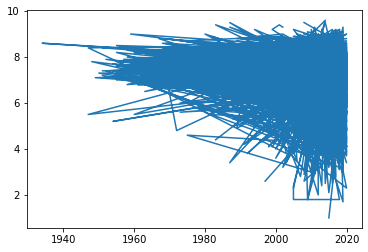

In [32]:
# let's make a plot of IMDb rating as a function of year using matplotlib -- plt
plt.plot(movies['Year'],movies['IMDb'])
plt.show()

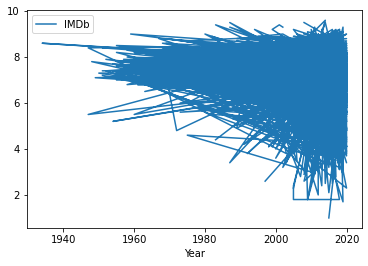

In [33]:
# let's re-try this weird line plot using the .plot
movies.plot(x='Year', y='IMDb') # we note: the function is actually the whole "movies.plot"
plt.show()

In [34]:
movies.plot?

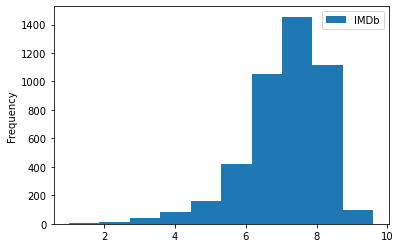

In [43]:
movies.plot(y='IMDb', kind='hist') # histogram plot, summarizing the IMDb ratings
# we say "y" = IMDb and it's really only plotting 1 variable -- IMDb
plt.show()

In [37]:
movies.plot?

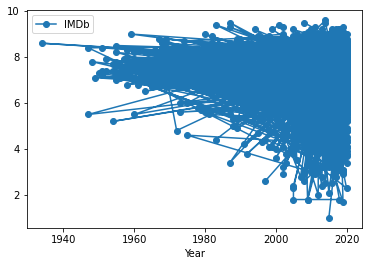

In [39]:
movies.plot(x='Year', y='IMDb', marker='o') 
plt.show()

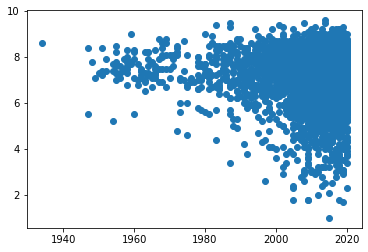

In [41]:
#plt.plot(gdp['DATE'], gdp['GDP'])
#plt.show()

plt.plot(movies['Year'], movies['IMDb'], 'o')
plt.show()

### Summarize
 * we've done matplotlib plots using `plt`
 * we've done data driven plots using `.plot` function with Pandas data
 
Let's focus a bit on doing "engine - driven" plots, fancy of saying let's hone our matplotlib skills more!

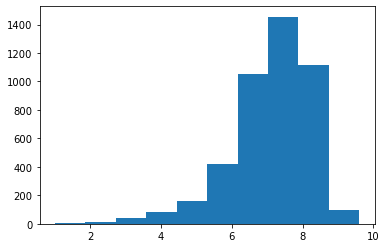

In [45]:
# use plt to make this histogram plot we made before
plt.hist(movies['IMDb'])
plt.show()

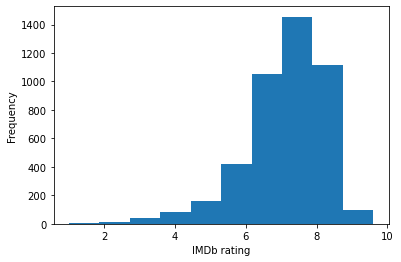

In [46]:
# let's put some labels on our data
plt.hist(movies['IMDb']) # this defaults to making a histogram of the column you give it
plt.xlabel('IMDb rating')
plt.ylabel('Frequency')
plt.show()

In [47]:
movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [48]:
movies['Year']

0       2008
1       2016
2       2017
3       2010
4       2015
        ... 
5606    2018
5607    2017
5608    2018
5609    2017
5610    2016
Name: Year, Length: 5611, dtype: int64

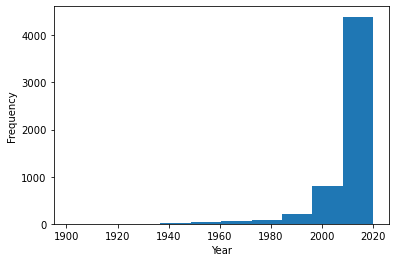

In [50]:
# let's put some labels on our data
plt.hist(movies['Year']) # this defaults to making a histogram of the column you give it
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

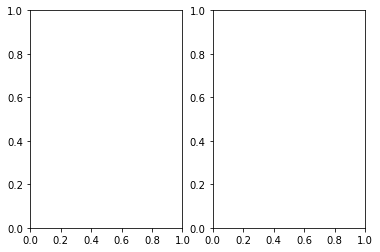

In [65]:
fig, ax = plt.subplots(1,2) # 1 row of plots and 2 columns of plots
# fig is an object that contains both plots
# ax contains our individual plots

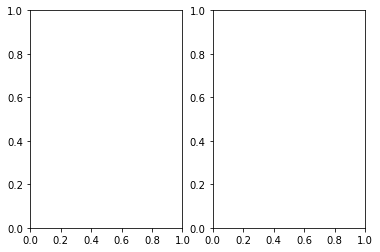

In [66]:
fig # this is sort of like the canvas

In [67]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5303209d0>,
      dtype=object)

In [54]:
plt.subplots?

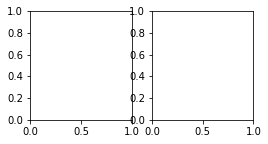

In [60]:
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(4, 2)) # 1 row of plots and 2 columns of plots


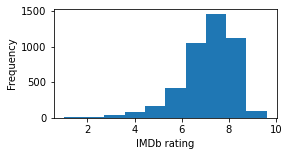

In [64]:
# before side by side, let's start with making 1 plot
#. Let's redo our IMDb plot with this new calling sequence

fig, ax = plt.subplots(nrows = 1,ncols = 1, figsize=(4, 2)) 

ax.hist(movies['IMDb']) # now we have to be contious about layout
ax.set_xlabel('IMDb rating') # note this is called with a "set_"
ax.set_ylabel('Frequency')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

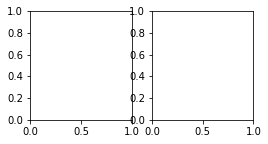

In [68]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(4, 2)) 

ax.hist(movies['IMDb']) # ax object is NOT something I can plot with
ax.set_xlabel('IMDb rating') # note this is called with a "set_"
ax.set_ylabel('Frequency')
plt.show()

In [69]:
ax # my array of axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5088677d0>,
      dtype=object)

In [70]:
ax[0] # so this element I can actually plot with because its a matplotlib axes

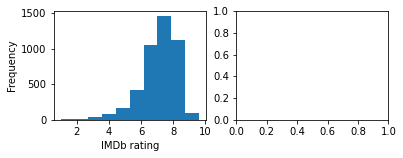

In [73]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(6, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

plt.show()

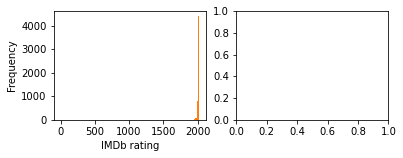

In [75]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(6, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[0].hist(movies['Year']) # I've updated the column that is being histogrammed
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

plt.show()
# here we didn't update what axes we are plotting on so we overplotted stuff on 
#.  our first axes!

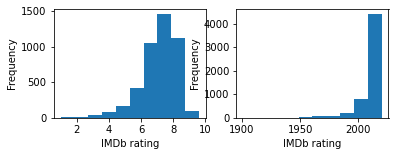

In [76]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(6, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()
# layout is a little smooshed AND my x-axis label on the 2nd set of axis is wrong

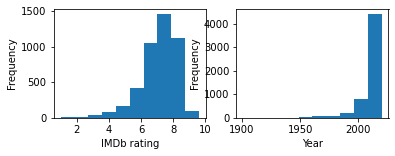

In [77]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(6, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()
# layout still a little funny

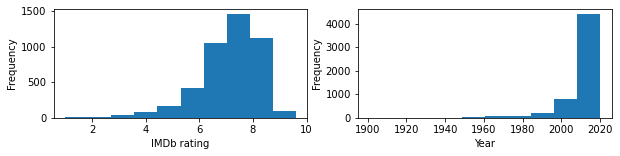

In [78]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()

In [79]:
for myAxes in ax:
    print(myAxes)

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


## If you are interested here is some more fancy Pandas stuff

In [80]:
type(movies) # DataFrame object, popular for stats and also machine learning stuff

pandas.core.frame.DataFrame

In [81]:
movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [84]:
movies.iloc[5:7,:]

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
5,5,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,6,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1


In [85]:
movies.iloc[5:7,:4] # 7, 6 rows AND only the first 3 columns

,Unnamed: 0,Title,Year,Age
5,5,The Office,2005,16+
6,6,Black Mirror,2011,18+


In [86]:
# also use .loc instead to subset by name
movies.loc[:, ['Title','Year']]

,Title,Year
0,Breaking Bad,2008
1,Stranger Things,2016
2,Money Heist,2017
3,Sherlock,2010
4,Better Call Saul,2015
...,...,...
5606,Tut's Treasures: Hidden Secrets,2018
5607,Paradise Islands,2017
5608,Wild Russia,2018
5609,Love & Vets,2017


In [87]:
movies['Year'] < 1970

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Name: Year, Length: 5611, dtype: bool

In [89]:
movies.loc[movies['Year'] < 1970] # .loc NOT .iloc

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
59,59,The Twilight Zone,1959,7+,9.0,82%,1,1,0,0,1
99,99,Star Trek,1966,7+,8.3,80%,1,1,1,0,1
112,112,Monty Python's Flying Circus,1969,16+,8.8,100%,1,0,0,0,1
360,360,The Andy Griffith Show,1960,all,8.3,NaN,1,0,1,0,1
558,558,Dad's Army,1968,7+,8.1,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4965,4965,I've Got a Secret,1961,NaN,NaN,NaN,0,0,1,0,1
4985,4985,Classic Popeye,1960,NaN,NaN,NaN,0,0,1,0,1
5039,5039,Television Playhouse,1947,NaN,NaN,NaN,0,0,1,0,1
5442,5442,The Wackiest Works of Tex Avery,1945,NaN,NaN,NaN,0,0,1,0,1


In [90]:
early_movies = movies.loc[movies['Year'] < 1970]

In [91]:
early_movies

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
59,59,The Twilight Zone,1959,7+,9.0,82%,1,1,0,0,1
99,99,Star Trek,1966,7+,8.3,80%,1,1,1,0,1
112,112,Monty Python's Flying Circus,1969,16+,8.8,100%,1,0,0,0,1
360,360,The Andy Griffith Show,1960,all,8.3,NaN,1,0,1,0,1
558,558,Dad's Army,1968,7+,8.1,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4965,4965,I've Got a Secret,1961,NaN,NaN,NaN,0,0,1,0,1
4985,4985,Classic Popeye,1960,NaN,NaN,NaN,0,0,1,0,1
5039,5039,Television Playhouse,1947,NaN,NaN,NaN,0,0,1,0,1
5442,5442,The Wackiest Works of Tex Avery,1945,NaN,NaN,NaN,0,0,1,0,1


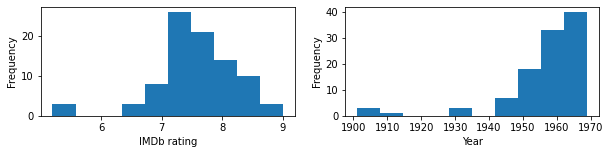

In [93]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(early_movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(early_movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()

In [94]:
# another subset of LATE movies
late_movies = movies.loc[movies['Year'] >= 1970]

In [96]:
late_movies

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1


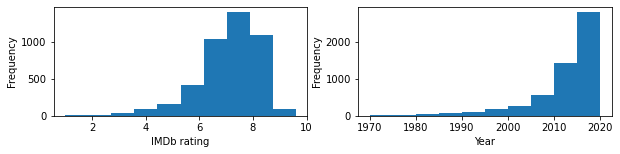

In [98]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(late_movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(late_movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()

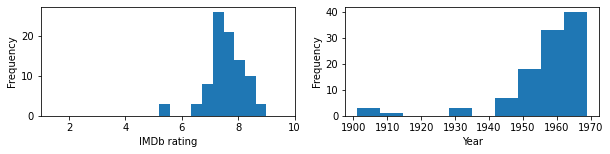

In [99]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(early_movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(1,10)

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(early_movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()

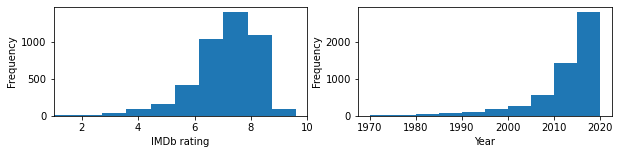

In [100]:
# now, finally!  let's do some side-by-side plots
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10, 2)) # figsize(width, height)

# plotting on my FIRST set of axes by indexing my "ax" ARRAY with its first index
ax[0].hist(late_movies['IMDb']) # ax object is NOT something I can plot with
ax[0].set_xlabel('IMDb rating') # note this is called with a "set_"
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(1,10)

# on my SECOND set of axis I want to do a distribution of "Year" column
#ax[0].hist(movies['Years']) # This doesn't work because "Years" is NOT "Year"
ax[1].hist(late_movies['Year']) # I've updated the column that is being histogrammed
ax[1].set_xlabel('Year') # note this is called with a "set_"
ax[1].set_ylabel('Frequency')

plt.show()

In [101]:
# we can actually do stats calcualtions by hand
movies['IMDb'].mean()

7.113258426966292

In [102]:
early_movies['IMDb'].mean()

7.54659090909091

In [107]:
movies['IMDb'].mean()

7.113258426966292

In [109]:
movies['IMDb'].sum()/len(movies['IMDb'])

5.641418641953306

In [110]:
sum(list(movies['IMDb']))

nan

In [111]:
sum?